In [12]:
!pip install openpyxl
!pip install statsmodels openpyxl
!pip install xgboost
!pip install matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 721.1 kB/s  0:00:12m0:00:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl (4.9 MB)
Using cac

Data shape: (100, 8)


,usia,lama_rehab,tingkat_stres,dukungan_keluarga,riwayat_kambuh,jenis_narkotika,kehadiran_konseling,keberhasilan
0,46,3,1,Sedang,Ya,Obat Penenang,86,0
1,32,5,9,Rendah,Ya,Ganja,90,0
2,25,3,6,Tinggi,Tidak,Obat Penenang,85,1
3,38,1,3,Tinggi,Tidak,Heroin,76,1
4,36,5,4,Tinggi,Tidak,Heroin,66,1


✅ Akurasi Model: 0.75

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.80      0.73      0.76        11

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



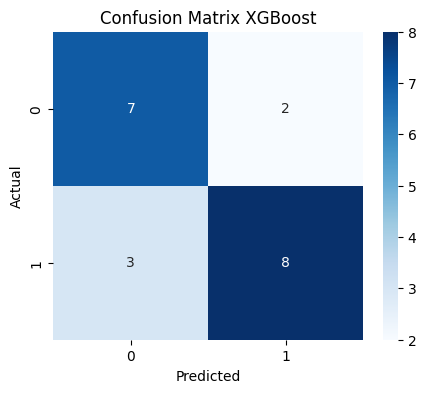

✅ Model disimpan ke model_rehab_xgboost.pkl
Contoh Prediksi:
   Prediksi  Asli
0         0     0
1         1     1
2         1     0
3         1     0
4         0     0


In [14]:
# train_model_xgboost.ipynb

# =======================================
# 1️⃣ Import Library
# =======================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# =======================================
# 2️⃣ Load Dataset
# =======================================
data = pd.read_excel("data_rehabilitasi.xlsx")
print("Data shape:", data.shape)
display(data.head())

# =======================================
# 3️⃣ Preprocessing
# =======================================
# Encode kategorikal
categorical_cols = [
	"dukungan_keluarga",
	"riwayat_kambuh",
	"jenis_narkotika",
	"kehadiran_konseling",
]
le = LabelEncoder()
for col in categorical_cols:
	data[col] = le.fit_transform(data[col])

# Pisahkan fitur dan label
X = data.drop("keberhasilan", axis=1)
y = data["keberhasilan"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42
)

# =======================================
# 4️⃣ Model Training (XGBoost)
# =======================================
model = XGBClassifier(
	n_estimators=150,
	learning_rate=0.1,
	max_depth=4,
	subsample=0.8,
	colsample_bytree=0.8,
	random_state=42,
	eval_metric="logloss",
)

model.fit(X_train, y_train)

# =======================================
# 5️⃣ Evaluation
# =======================================
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Akurasi Model: {acc:.2f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =======================================
# 6️⃣ Simpan Model
# =======================================
joblib.dump(model, "model_rehab_xgboost.pkl")
print("✅ Model disimpan ke model_rehab_xgboost.pkl")

# =======================================
# 7️⃣ Prediksi Contoh Baru
# =======================================
sample = X_test.iloc[:5]
pred_sample = model.predict(sample)
print("Contoh Prediksi:")
print(pd.DataFrame({"Prediksi": pred_sample, "Asli": y_test.iloc[:5].values}))
